Objective:

Identify periodical tags based on the similarities of word embeddings between tag and seed tag. 

Methond:

- Seed tags: mannually selected periodical tags;
- Word embedding: bert-base-uncased;
- similarity: cosine similarity;

# 1. BERT embedding + mean seeds embedding

Ran in Google Colab

Seed embedding --> mean embedding of the seeds

In [ ]:
!pip install transformers
!pip install torch
!pip install sklearn
!pip install pandas

In [ ]:
from transformers import AutoTokenizer, AutoModel
from sklearn.metrics.pairwise import cosine_similarity
import torch
import numpy as np
import pandas as pd

In [ ]:
tokenizer = AutoTokenizer.from_pretrained("bert-base-uncased")
model = AutoModel.from_pretrained("bert-base-uncased")

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

In [ ]:
seeds_path = "/content/drive/MyDrive/RA_ReMedia/tag_periodical_seeds.csv"
tag_path = "/content/drive/MyDrive/RA_ReMedia/tag_counter.csv"

In [ ]:
# read seeds
seeds_df = pd.read_csv(seeds_path)
seeds = seeds_df['periodical_tag'].tolist()

In [ ]:
seeds_embeddings = []

# Create BERT embeddings for seeds
for tag in seeds:
    inputs = tokenizer(tag, return_tensors="pt")
    outputs = model(**inputs)
    embedding = outputs.last_hidden_state.mean(dim=1)
    seeds_embeddings.append(embedding.detach().numpy())

In [ ]:
# seeds embeddings shape
seeds_embeddings[0].shape

(1, 768)

In [ ]:
seeds_embeddings_mean = np.mean(seeds_embeddings, axis=0)

In [ ]:
tags_df = pd.read_csv(tag_path)

def get_tag_embedding(tag):
    inputs = tokenizer(tag, return_tensors="pt")
    outputs = model(**inputs)
    embedding = outputs.last_hidden_state.mean(dim=1)
    return embedding.detach().numpy()

process_count = 0
tags_df["embedding"] = None
tags_df["similarity"] = None

for index, row in tags_df.iterrows():
    tag = row["tag"]
    embedding = get_tag_embedding(tag)
    similarity = cosine_similarity(embedding, seeds_embeddings_mean)

    process_count += 1
    if process_count % 10 == 0:
        print(f"Processed {process_count} tags")

    tags_df.at[index, "embedding"] = embedding
    tags_df.at[index, "similarity"] = similarity

Processed 10 tags
Processed 20 tags
Processed 30 tags
Processed 40 tags
Processed 50 tags
Processed 60 tags
Processed 70 tags
Processed 80 tags
Processed 90 tags
Processed 100 tags
Processed 110 tags
Processed 120 tags
Processed 130 tags
Processed 140 tags
Processed 150 tags
Processed 160 tags
Processed 170 tags
Processed 180 tags
Processed 190 tags
Processed 200 tags
Processed 210 tags
Processed 220 tags
Processed 230 tags
Processed 240 tags
Processed 250 tags
Processed 260 tags
Processed 270 tags
Processed 280 tags
Processed 290 tags
Processed 300 tags
Processed 310 tags
Processed 320 tags
Processed 330 tags
Processed 340 tags
Processed 350 tags
Processed 360 tags
Processed 370 tags
Processed 380 tags
Processed 390 tags
Processed 400 tags
Processed 410 tags
Processed 420 tags
Processed 430 tags
Processed 440 tags
Processed 450 tags
Processed 460 tags
Processed 470 tags
Processed 480 tags
Processed 490 tags
Processed 500 tags
Processed 510 tags
Processed 520 tags
Processed 530 tags
Pr

In [ ]:
tags_df["similarity"] = tags_df["similarity"].apply(lambda x: x[0][0])
tags_df.head()

,tag,frequency,embedding,similarity
0,graphic-novels,3023,"[[0.40633926, -0.24556437, -0.46027732, 0.1490...",0.694093
1,graphic-novel,2348,"[[0.2987055, -0.5025251, -0.50262964, 0.059347...",0.681714
2,biography,1394,"[[0.48794904, 0.12581165, -0.2842401, -0.08634...",0.698958
3,non-fiction,1124,"[[0.026022982, -0.017312462, -0.55139077, -0.4...",0.647120
4,comics,1061,"[[0.08799952, 0.0579039, -0.3134333, 0.1207434...",0.783762


In [ ]:
embedded_tag_path = "/content/drive/MyDrive/RA_ReMedia/tag_embedding.csv"
tags_df.to_csv(embedded_tag_path, index=False)

In [ ]:
sorted_tags_df = tags_df.sort_values(by="similarity", ascending=False)
sorted_tags_df.head(100)

,tag,frequency,embedding,similarity
177,1960s,17,"[[0.014010052, 0.13972555, -0.25068316, -0.018...",0.894091
435,1940s,6,"[[-0.1420747, -0.114106774, -0.69526464, 0.013...",0.881697
199,1950s,15,"[[-0.28304836, -0.08655027, -0.38026586, 0.095...",0.876671
861,1920s,3,"[[-0.13500811, -0.09665411, -0.5052511, 0.0612...",0.876488
890,1970s,3,"[[-0.012716929, -0.019351238, -0.3792139, -0.0...",0.871505
...,...,...,...,...
2727,depression,1,"[[-0.059860665, -0.024852032, -0.6389521, 0.06...",0.792624
2023,brothers,2,"[[0.083954334, 0.17528109, -0.14910395, -0.110...",0.792455
4437,collection,1,"[[0.16042696, -0.101604134, -0.16189052, -0.13...",0.792298
3893,musica,1,"[[0.1356054, -0.11790183, -0.026386922, -0.070...",0.791572


In [ ]:
thresholds = [0.8]

filtered_df = sorted_tags_df[sorted_tags_df["similarity"] >= thresholds[0]]
filtered_list = filtered_df["tag"].tolist()
for tag in filtered_list:
    print(tag)


1960s
1940s
1950s
1920s
1970s
2000s
2010s
1930s
sixties
gothic
1980s
2020
1900s-ce
1800s-ce
1910s
1800s
victorian
2009
mythology
1700s
childhood
abandoned
1950s-1960s
2010
lesbian
genocide
kidnapping
1960s-1970s
2011
2019
paris
wwii
1790s
environment
immigrants
communism
1870s
espionage
civilization
chairman
asian
cartoons
nuclear
1980
2013
asia
campus
activist
anime
1780s
censorship
son
paper
war
cartoon
euro
dramatic
1960s-america


In [ ]:
filtered_df

,tag,frequency,embedding,similarity
177,1960s,17,"[[0.014010052, 0.13972555, -0.25068316, -0.018...",0.894091
435,1940s,6,"[[-0.1420747, -0.114106774, -0.69526464, 0.013...",0.881697
199,1950s,15,"[[-0.28304836, -0.08655027, -0.38026586, 0.095...",0.876671
861,1920s,3,"[[-0.13500811, -0.09665411, -0.5052511, 0.0612...",0.876488
890,1970s,3,"[[-0.012716929, -0.019351238, -0.3792139, -0.0...",0.871505
296,2000s,10,"[[-0.10823178, -0.17021592, -0.23243769, -0.12...",0.864819
269,2010s,11,"[[-0.10999, -0.0023045938, -0.18214208, 0.0312...",0.860294
832,1930s,3,"[[-0.12997681, -0.049715295, -0.4233103, 0.041...",0.859935
1643,sixties,2,"[[0.24366556, 0.3094124, 0.07886086, 0.1863215...",0.845289
1208,gothic,3,"[[-0.2470556, 0.18362252, -0.30191168, -0.2364...",0.841568


In [ ]:
tag_sim_path = "/content/drive/MyDrive/RA_ReMedia/tag_embedding.csv"
tag_sim_df = pd.read_csv(tag_sim_path)
tag_sim = tag_sim_df[["tag", "frequency", "similarity"]]
tag_sim.head()

,tag,frequency,similarity
0,graphic-novels,3023,0.694093
1,graphic-novel,2348,0.681714
2,biography,1394,0.698958
3,non-fiction,1124,0.647120
4,comics,1061,0.783762


In [ ]:
tag_sim_sorted = tag_sim.sort_values(by="similarity", ascending=False)

In [ ]:
seed_path = "/content/drive/MyDrive/RA_ReMedia/tag_periodical_seeds.csv"
seed_df = pd.read_csv(seed_path)
seeds = seed_df["periodical_tag"].tolist()

for seed in seeds:
    similarity_value = tag_sim[tag_sim['tag'] == seed]["similarity"]
    print(f"Seed: {seed}\tSimilarity: {similarity_value}")


Seed: 20th-century	Similarity: 82    0.768784
Name: similarity, dtype: float64
Seed: 21st-century	Similarity: 140    0.749158
Name: similarity, dtype: float64
Seed: wwii	Similarity: 160    0.807605
Name: similarity, dtype: float64
Seed: 1960s	Similarity: 177    0.894091
Name: similarity, dtype: float64
Seed: 1950s	Similarity: 199    0.876671
Name: similarity, dtype: float64
Seed: 19th-century	Similarity: 259    0.742071
Name: similarity, dtype: float64
Seed: 2010s	Similarity: 269    0.860294
Name: similarity, dtype: float64
Seed: world-war-ii	Similarity: 287    0.745112
Name: similarity, dtype: float64
Seed: 2000s	Similarity: 296    0.864819
Name: similarity, dtype: float64
Seed: 1940s	Similarity: 435    0.881697
Name: similarity, dtype: float64
Seed: ww2	Similarity: 632    0.667551
Name: similarity, dtype: float64
Seed: 1960-s	Similarity: 749    0.79452
Name: similarity, dtype: float64
Seed: 60-s	Similarity: 858    0.75731
Name: similarity, dtype: float64
Seed: 1920s	Similarity: 861  

# 2. Max similarity

Ran in local environment.

In [39]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.metrics.pairwise import cosine_similarity
import ast
import re
from wordcloud import WordCloud

## 2.1 BERT-based embedding max similairity

In [2]:
seed_path = "../Data/Tags/tag_periodical_seeds.csv"
embedding_path = "../Data/Tags/tag_embedding.csv"

seed_df = pd.read_csv(seed_path)
embedding_df = pd.read_csv(embedding_path)

In [3]:
# Clean embedding column to make it an array

def clean_embedding(emb_str):
  emb_str = emb_str.replace(" ", ",")
  emb_str = emb_str.strip("[]")
  emb_str = re.sub(r'[,\s]+', ',', emb_str)
  emb_str = emb_str[1:]
  embedding_list = np.fromstring(emb_str, sep=',')
  return embedding_list

In [6]:
# Clean all embeddings
for index, row in embedding_df.iterrows():
  if pd.isnull(row["embedding"]):
    print(f"Row {index} has a None embedding")

embedding_df["embedding"] = embedding_df["embedding"].apply(clean_embedding)

In [ ]:
# Check the length of the embeddings

for index, row in embedding_df.iterrows():
  if len(row["embedding"]) != 768: # BERT embeddings are of length 768
    print(f"Row {index} has an embedding of length {len(row['embedding'])}")

print("Finished checking embeddings")

Finished checking embeddings


In [ ]:
# Get seed embeddings

# Initialize empty embedding column
seed_df["embedding"] = np.empty((len(seed_df), 0)).tolist()

for index, row in seed_df.iterrows():
    seed = row["periodical_tag"]
    if not embedding_df[embedding_df["tag"] == seed]["embedding"].empty:
        seed_embedding = embedding_df[embedding_df["tag"] == seed]["embedding"].values[0]
        seed_df.at[index, "embedding"] = seed_embedding
    else:
        print(f"No embedding found for seed: {seed}")

In [ ]:
# Check the type of the embeddings

print(seed_df["embedding"].head())
print(type(seed_df["embedding"][0]))
print(embedding_df["embedding"].head())
print(type(embedding_df["embedding"][0]))

0    [0.0112983827, -0.496625662, -0.303533256, -0....
1    [0.130205125, -0.408254325, -0.143256932, -0.1...
2    [0.00872961711, 0.0696070194, -0.344364136, -0...
3    [0.0140100522, 0.139725551, -0.250683159, -0.0...
4    [0.283048362, -0.086550273, -0.380265862, 0.09...
Name: embedding, dtype: object
<class 'numpy.ndarray'>
0    [0.406339258, -0.245564371, -0.460277319, 0.14...
1    [0.298705488, -0.502525091, -0.502629638, 0.05...
2    [0.487949044, 0.125811651, -0.284240097, -0.08...
3    [0.0260229819, -0.0173124615, -0.551390767, -0...
4    [0.0879995227, 0.0579039007, -0.31343329, 0.12...
Name: embedding, dtype: object
<class 'numpy.ndarray'>


In [11]:
seeds_embeddings = seed_df["embedding"].tolist()

# Define a function to calculate the maximum similarity of a tag embedding to seed embeddings
def max_similarity(tag_embedding, seed_embeddings):
    similarities = [cosine_similarity([tag_embedding], [seed])[0, 0] for seed in seed_embeddings]
    return max(similarities)

# Calculate the maximum similarity of each tag embedding to seed embeddings
embedding_df["max_similarity"] = embedding_df["embedding"].apply(lambda x: max_similarity(x, seeds_embeddings))

embedding_df.head()


,tag,frequency,embedding,similarity,max_similarity
0,graphic-novels,3023,"[0.406339258, -0.245564371, -0.460277319, 0.14...",0.694093,0.651454
1,graphic-novel,2348,"[0.298705488, -0.502525091, -0.502629638, 0.05...",0.681714,0.620045
2,biography,1394,"[0.487949044, 0.125811651, -0.284240097, -0.08...",0.698958,0.707737
3,non-fiction,1124,"[0.0260229819, -0.0173124615, -0.551390767, -0...",0.647120,0.691169
4,comics,1061,"[0.0879995227, 0.0579039007, -0.31343329, 0.12...",0.783762,0.804630


In [23]:
embedding_df["max_similarity"] = embedding_df["max_similarity"].round(4)
embedding_df.head()

,tag,frequency,embedding,similarity,max_similarity
0,graphic-novels,3023,"[0.406339258, -0.245564371, -0.460277319, 0.14...",0.694093,0.6515
1,graphic-novel,2348,"[0.298705488, -0.502525091, -0.502629638, 0.05...",0.681714,0.6200
2,biography,1394,"[0.487949044, 0.125811651, -0.284240097, -0.08...",0.698958,0.7077
3,non-fiction,1124,"[0.0260229819, -0.0173124615, -0.551390767, -0...",0.647120,0.6912
4,comics,1061,"[0.0879995227, 0.0579039007, -0.31343329, 0.12...",0.783762,0.8046


In [24]:
max_sim_path = "../Data/Tags/tag_embedding_maxsim.csv"
embedding_df.to_csv(max_sim_path, index=False)

In [25]:
embedding_df_sorted = embedding_df.sort_values(by="max_similarity", ascending=False, ignore_index=True)
embedding_df_sorted.head(100)

,tag,frequency,embedding,similarity,max_similarity
0,wwii,18,"[0.00872961711, 0.0696070194, -0.344364136, -0...",0.807605,1.0000
1,60-s,3,"[0.104039773, 0.00201999838, 0.118994735, 0.04...",0.757310,1.0000
2,ww2,4,"[0.340816736, -0.321048975, -0.510701537, -0.3...",0.667551,1.0000
3,1940s,6,"[0.142074704, -0.114106774, -0.695264637, 0.01...",0.881697,1.0000
4,2000s,10,"[0.108231783, -0.17021592, -0.232437685, -0.12...",0.864819,1.0000
...,...,...,...,...,...
95,anne,2,"[0.219905213, -0.0956013873, -0.277137965, -0....",0.792916,0.8716
96,2010,4,"[0.0522550754, 0.0610963106, -0.0678947493, 0....",0.812953,0.8715
97,historic,3,"[0.0908545852, -0.0701368451, -0.304542869, -0...",0.776833,0.8714
98,drawing,1,"[0.0985594615, 0.0823968276, -0.192202449, -0....",0.788625,0.8705


In [43]:
high_similarity_df = embedding_df_sorted[embedding_df_sorted["max_similarity"] >= 0.80]
high_sim = high_similarity_df["tag"].tolist()
for tag in high_sim:
    print(tag)

wwii
60-s
ww2
1940s
2000s
world-war-ii
1901-2000-modern-set
hist-h-late-modern-1900-1945
2010s
20th-century
19th-century
1920s
1960-s
1950s
1960s
21st-century
victorian
1970-s
1970s
18th-century
1930s
ww1
entertaining
1800s
haunting
aeronautics
aging
keeper
hardship
standalone
1910s
kidnapping
mavericks
maverick
teen
inspirational
circus
banned
unusual
generations
frank
leisure
sis
showcase
24-s
disappointing
skimmed
civilization
adaptations
indifferent
addiction
disturbing
ob
français
curiosity
internment
taboo
resolutions
disabilities
abrams
tunisian
epic
factual
1980s
espionage
dramatic
favorite
adoption
cartoon
favorites
hiding
atomic
colleen
coding
slavery
gothic
1870s
indie
disliked
latino
john
inspiration
bolsheviks
stem
mississippi
bestseller
autobiographical
afro
sixties
reading
medical
keepers
libby
visual
halloween
anne
2010
historic
drawing
ancestors
requested
encouraging
graphic
families
killer
anticipated
nuclear
discussions
1880s
disappointed
monster
challenged
2011
impo

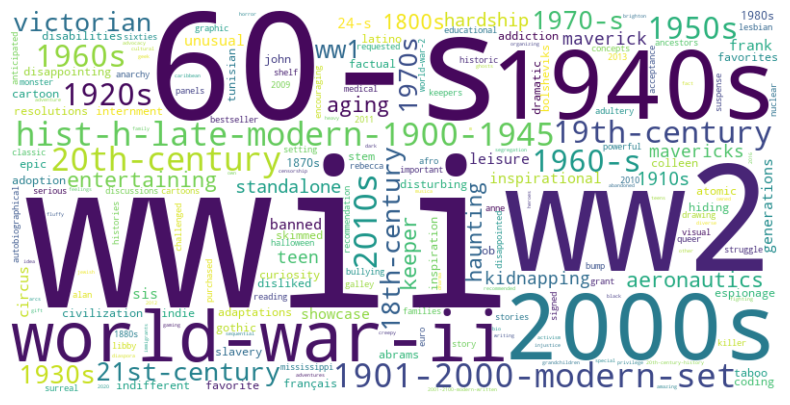

In [44]:
# Plot a word cloud of tags with high similarity to seed tags

# Find the highest max_similarity value that is less than 1
highest_max_similarity_less_than_1 = high_similarity_df[high_similarity_df["max_similarity"] < 1]["max_similarity"].max()

# Update max_similarity values of 1 to the highest max_similarity value that is less than 1
high_similarity_df.loc[high_similarity_df["max_similarity"] == 1, "max_similarity"] = highest_max_similarity_less_than_1

# Create a dictionary with tags and their updated max_similarity values
tag_similarity_dict = dict(zip(high_similarity_df['tag'], high_similarity_df['max_similarity']))

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(tag_similarity_dict)

# Plot the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

## 2.2 Compare BERT-based similarity with GPT-4 similarity

GPT-4 filtered periodical tags: ../Data/Tags/GPT-4_Filtered_Periodical_Tags.csv

In [40]:
gpt_tag_path = "../Data/Tags/GPT-4_Filtered_Periodical_Tags.csv"
gpt_tag = pd.read_csv(gpt_tag_path)

In [45]:
# Convert the tags to sets for comparison
gpt_tags_set = set(gpt_tag["tag"])
embedding_tags_set = set(high_sim)

# Find the tags that are in gpt_tag but not in embedding_df_sorted
gpt_not_in_embedding = gpt_tags_set - embedding_tags_set

# Find the tags that are in embedding_df_sorted but not in gpt_tag
embedding_not_in_gpt = embedding_tags_set - gpt_tags_set

print("Tags in GPT-4 filtered tags but not in embedding_df_sorted:")
print(gpt_not_in_embedding)

print("\nTags in embedding_df_sorted but not in GPT-4 filtered tags:")
print(embedding_not_in_gpt)

Tags in GPT-4 filtered tags but not in embedding_df_sorted:
{'nonfiction-general', '20th-c-amer', 'diverse-literature', '100-200-pages', 'language-2023-2024', 'graphic-novels-are-literature-too', 'bibliophage', 'children-s-literature-a', 'coming_of_age', 'ya-literature', 'young-adult-literature', '21th-century', 'the-liberating-power-of-rock-n-roll', '__époque_1960s-1970s', 'children-s-literature-307', 'ages-15-18', 'equity-liberation', 'non-fiction_general', 'espionage-and-spy-stories', 'asian-american-literature', 'eng-420-ya-literature', 'coming-of-age', 'biographie-memoire-temoignage', 'ni-book-voyage', 'adolescent-literature', 'graphic-literature', 'language-english', 'multicultural-children-s-literature', '20th-cent', 'vintage-lesbians', 'literature-database', 'age-adult-books', '21st-century-best-books', 'history-wwii-holocaust', '1age-senior-high', 'french-literature', 'childrens-literature-grades-k-5', 'for-your-consideration-2020-21', 'queer-literature', 'page-turners', 'age-

In [46]:
print(len(high_sim))

335
